

- the import



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline


- read the dataset



In [ ]:
filepath = 'https://raw.githubusercontent.com/yoel2000/Intro_to_A.I/main/Project/advertising.csv'
data = pd.read_csv(filepath, sep=',')

- explore the data

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
len(data) # the number of example

1000

The target value is the last column "Cliked on Ad". The purpose of the project is to know according to parameters if a person will clik on the ad.

In [ ]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [ ]:
data.describe() # Generate descriptive statistics.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


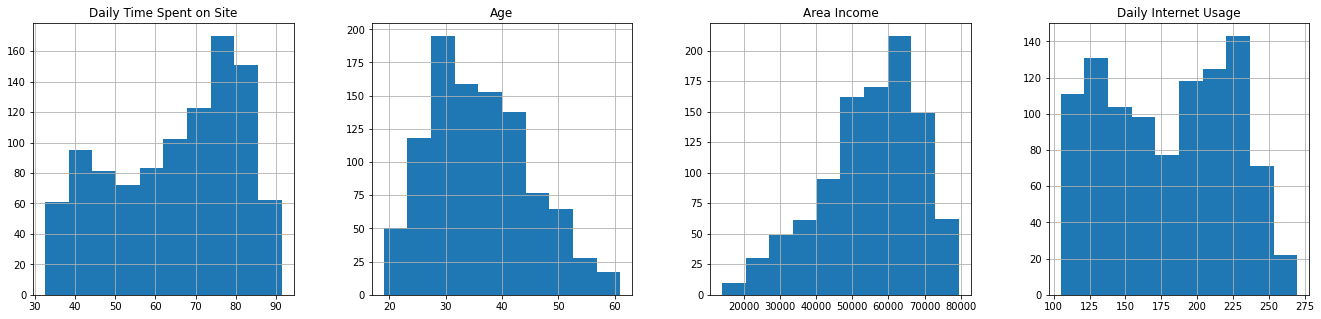

In [ ]:
# plot some features
data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']].hist(figsize=(35, 5), layout=(1,6))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbab91ee410>,
      dtype=object)

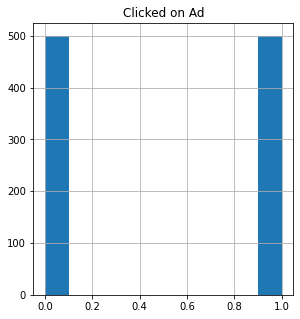

In [ ]:
data[["Clicked on Ad"]].hist(figsize=(35, 5), layout=(1,6)) # The target has the same number of 1s as 0s.

In [ ]:
con_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
df_corr = data[con_cols].corr().transpose()
df_corr

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658
Age,-0.331513,1.000000,-0.182605,-0.367209
Area Income,0.310954,-0.182605,1.000000,0.337496
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000


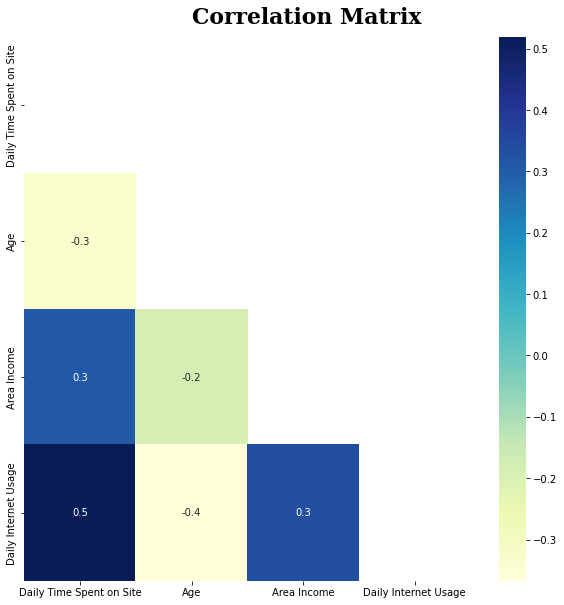

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = data[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
# The correlation matrix shows that there is weak relationship between the variables.

- data preprocessing




In [ ]:
data.isna().sum() # check if there are null values.

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
object_variables = ['Ad Topic Line', 'City', 'Country']
data[object_variables].describe()

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Versatile 4thgeneration system engine,Lisamouth,France
freq,1,3,9


As we can see, all the values are different in the "Ad Topic Line" column. And, in the "City" column, almost all the values are different. So, we can delete these 2 columns because it's almost impossible to do machine learning when the values are different.

In [ ]:
data = data.drop(['Ad Topic Line', 'City'], axis=1)

In [ ]:
data.head() # Check if the drop worked well.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
data['Country'].value_counts()[:10].sort_values(ascending=False)

Czech Republic    9
France            9
Peru              8
Greece            8
Australia         8
South Africa      8
Afghanistan       8
Micronesia        8
Cyprus            8
Turkey            8
Name: Country, dtype: int64

So, we can see that also for the "Country" column, there are no countries that are important. Indeed, the country with the strongest appearance has only 9 appearances (and there are 237 countries in the dataset).
So, we will also drop this column.

In [ ]:
data = data.drop(['Country'], axis=1)

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


Also, we can maybe have more information with the timestamp parameter. 

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [ ]:
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Month,Day,Hour
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,3,27,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,4,4,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,3,13,20
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,1,10,2
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,6,3,3


We can now also delete the "Timestamp" column because we take all the interesting data and convert it into 4 columns.

In [ ]:
data = data.drop(['Timestamp'], axis=1)

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,0
1,80.23,31,68441.85,193.77,1,0,4,4,1
2,69.47,26,59785.94,236.50,0,0,3,13,20
3,74.15,29,54806.18,245.89,1,0,1,10,2
4,68.37,35,73889.99,225.58,0,0,6,3,3


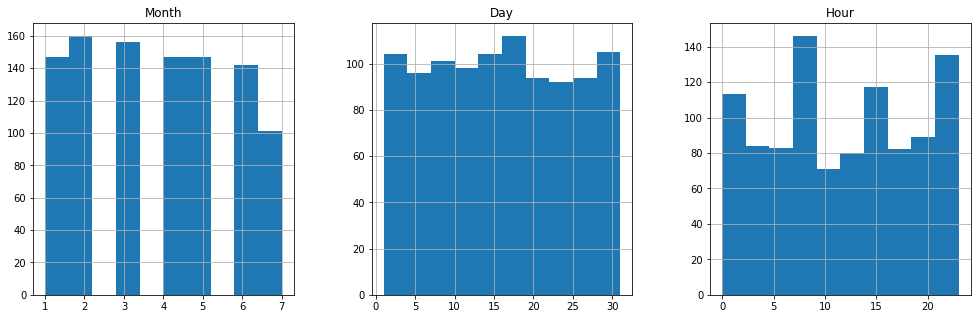

In [ ]:
data[['Month', 'Day', 'Hour']].hist(figsize=(35, 5), layout=(1,6))
plt.show()

In [ ]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Male                          int64
Clicked on Ad                 int64
Month                         int64
Day                           int64
Hour                          int64
dtype: object

- scaling the data

In [ ]:
df = data
# define the columns to be encoded and scaled
cat_cols = ['Male', 'Month', 'Day', 'Hour']
con_cols = ['Age', 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

# defining the features and target
X = df.drop(['Clicked on Ad'],axis=1) # features
y = df[['Clicked on Ad']] # target

# encoding the categorical columns
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

# instantiating the scaler
scaler = StandardScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day,Hour
0,0.249267,-0.114905,0.509691,1.734030,0,3,27,0
1,0.961132,-0.570425,1.002530,0.313805,1,4,4,1
2,0.282083,-1.139826,0.356949,1.287589,0,3,13,20
3,0.577432,-0.798185,-0.014456,1.501580,1,1,10,2
4,0.212664,-0.114905,1.408868,1.038731,0,6,3,3


- split the data into train and test part

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

The shape of X_train is  (800, 8)
The shape of X_test is  (200, 8)
The shape of y_train is  (800, 1)
The shape of y_test is  (200, 1)


1. The first model: Decision Tree (DT)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [ ]:
dt.tree_.node_count, dt.tree_.max_depth

(75, 15)

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [ ]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.920000
precision,1.0,0.920354
recall,1.0,0.936937
f1,1.0,0.928571


In [ ]:
confusion_matrix(y_test,y_test_pred)


array([[ 80,   9],
       [  7, 104]])

In [ ]:
print(confusion_matrix(y_train,y_train_pred))

[[411   0]
 [  0 389]]


In [ ]:
 rmse_val = []

for K in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=K)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  
  error = mean_squared_error(y_test,y_pred, squared=False)
  rmse_val.append(error)
  print('RMSE value for k= ' , K , 'is:', error)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

RMSE value for k=  1 is: 0.37416573867739417
RMSE value for k=  2 is: 0.43588989435406733
RMSE value for k=  3 is: 0.3082207001484488
RMSE value for k=  4 is: 0.33166247903553997
RMSE value for k=  5 is: 0.3082207001484488
RMSE value for k=  6 is: 0.3535533905932738
RMSE value for k=  7 is: 0.31622776601683794
RMSE value for k=  8 is: 0.3872983346207417
RMSE value for k=  9 is: 0.34641016151377546
RMSE value for k=  10 is: 0.37416573867739417
RMSE value for k=  11 is: 0.3391164991562634
RMSE value for k=  12 is: 0.3674234614174767
RMSE value for k=  13 is: 0.324037034920393
RMSE value for k=  14 is: 0.37416573867739417
RMSE value for k=  15 is: 0.3391164991562634
RMSE value for k=  16 is: 0.3807886552931954
RMSE value for k=  17 is: 0.3535533905932738
RMSE value for k=  18 is: 0.3807886552931954
RMSE value for k=  19 is: 0.34641016151377546
RMSE value for k=  20 is: 0.37416573867739417


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

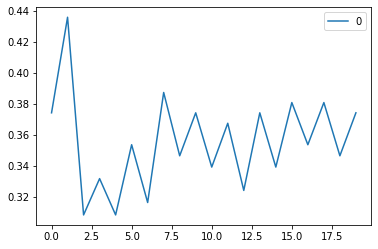

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

test_error = measure_error(y_test, y_pred, 'test')
test_error

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy     0.890000
precision    0.989011
recall       0.810811
f1           0.891089
Name: test, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

test_error = measure_error(y_test, y_pred, 'test')
test_error

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy     0.950000
precision    0.971963
recall       0.936937
f1           0.954128
Name: test, dtype: float64